# Overview 

Please see the [homework policy](https://fa20.fdl.thecoatlessprofessor.com/syllabus/#homework)
for detailed instructions and some grading notes. Failure to follow instructions
will result in point reductions. 

> "Learn from yesterday, live for today, hope for tomorrow. The important thing is not to stop questioning."
>
> -- Albert Einstein

## Grading

The rubric TAs will use to grade this assignment is:

| Task                                                   | Pts |
|:-------------------------------------------------------|----:|
| Breakin' Down a CNN for Scrap                          | 20  |
| Softmax and Cross-Entropy Sittin' in a Tree            | 20  |
| Grendel the destroyer and devourer of our human kind   | 40  |
| #YOLO ALMA                                             | 15  |
| Total                                                  | 95  |

## Objectives 

The objectives behind this homework assignment are as follows:

- Breakdown components of a Convolutional Neural Network (CNN);
- Designing PyTorch modules;
- Cost functions;
- Establishing sequential layers with Keras;
- Manipulating image data; 
- Re-using existing Neural Nets; and
- Storing data in a pandas data frame.


# Assignment - Homework 5
STAT 430 - FDL, Fall 2020

Due: **Thursday, November 5th, 2020 at 6:00 PM**

- **Author:** Mengchen Qiu
- **NetID:** mqiu3

### Collaborators

If you worked with any other student in preparing these answers, please
make sure to list their full names and NetIDs ( `Gaoyuan He` ).


In [ ]:
#@title (Hidden) Diagnostics
print("Diagnostics: ")

from IPython.display import Image
import sys

try:
  from google.colab import drive
  is_google_colab = True
  import pandas as pd
  import numpy as np

  %tensorflow_version 2.x
  import tensorflow as tf

  import torch
  import torch.nn as nn
  import torch.nn.functional as F
  import torch.optim as optim
  from torchvision import datasets, transforms
  from torch.optim.lr_scheduler import StepLR
  # Detect if a GPU is present with CUDA support
  use_cuda = torch.cuda.is_available()

  print(f"python: {sys.version}")
  print(f"pandas: {np.__version__}")
  print(f"tensorflow: {tf.__version__}")
  print(f"pytorch: {torch.__version__}")
  print(f"GPU Enabled: {use_cuda}")
  print("Notebook is on Google CoLab")
except:
  is_google_colab = False
  print("Notebook is being run locally or through another source.")

Diagnostics: 
python: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
pandas: 1.18.5
tensorflow: 2.3.0
pytorch: 1.7.0+cu101
GPU Enabled: True
Notebook is on Google CoLab


In [ ]:
# Mounting the device will require following instructions to enter a
if is_google_colab:
  drive.mount('/content/drive')
else:
  print("Please make sure to upload images to Compass2g.")

Mounted at /content/drive


# [20 Points] Exercise 1 - Breakin' Down a CNN for Scrap

**Have questions on Exercise 1? Please ask at: <https://campuswire.com/c/G9F0E3E38/feed/78>**

Consider the convolutional neural network architecture defined below.

- CONV:F-N represents a convolutional layer with $F \times F \times N$ filters
   - For all convolutional layers, let the padding be 2 and stride be 1.
- RELU denotes the activation function.
- POOL:P is a max-pooling layer with dimensions $P \times P$.
   - Let the stride be 2.
- FC:N shows a fully-connected network layer with $N$ neurons


## (a) [10 Points] Output Dimensions and Trainable Parameters

For each layer, provide the output dimensions and number of parameters present.
Show formulas. 

| Layer Name | Output Dimensions | Number of Parameters | 
|:-----------|:------------------|:---------------------|
| Input      | 64 x 64 x 3       |         0            |
| CONV:4-16  | 65 x 65 x 16      |         784          |
| RELU       | 65 x 65 x 16      |         0            |
| POOL:3     | 32 x 32 x 16      |         0            |
| CONV:5-16  | 32 x 32 x 16      |         6416         |
| RELU       | 32 x 32 x 16      |         0            |
| POOL:2     | 16 x 16 x 16      |         0            |
| FC:64      |  64 x 1           |         262208       |
| RELU       |  64 x 1           |         0            |
| FC:128     |  128 x 1          |         8320         |




## (b) [10 Points] PyTorch implementation of CNN

Implement the above Neural Network in PyTorch using an `nn` module. Check the dimensions of each layer by outputting size.

Recall that PyTorch uses dimensions:

$$ N \times C_{in} \times H \times W $$

- $N$ number of examples
- $C_{in}$ number of channels
- $H$ height of filter
- $W$ width of filter

_Hints:_ 

- Did you add a flatten layer prior to listing the dense/fully-connected layers?
- Does the PyTorch breakdown mirror the summary table above?

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# Construct a toyCNN class
class toyCNN(nn.Module):
    def __init__(self):
        # Call the super constructor for the nn module
        super(toyCNN, self).__init__()
        self.conv1 = nn.Conv2d(3,16,kernel_size=4,stride=1, padding=2)
        self.pool1 = nn.MaxPool2d(3, stride=2)
        self.conv2 = nn.Conv2d(16,16,kernel_size=5,stride=1, padding=2)
        self.pool2 = nn.MaxPool2d(2, stride=2)
        self.fc1 = nn.Linear(32768,64)
        self.fc2 = nn.Linear(64,128)
        # Code here for layers
        
    def forward(self, x):
        print(f"Input: {x.shape}")
        x = self.conv1(x)
        print(f"Conv:4-16 {x.shape}")
        x = F.relu(x)
        print(f"RELU1 {x.shape}")
        x = self.pool1(x)
        print(f"POOL3 {x.shape}")
        x = self.conv2(x)
        print(f"Conv:5-16 {x.shape}")
        x = F.relu(x)
        print(f"RELU2 {x.shape}")
        x = self.pool2(x)
        print(f"POOL2 {x.shape}")
        x = torch.flatten(x)
        x = self.fc1(x)
        print(f"FC1 {x.shape}")
        x = F.relu(x)
        print(f"RELU3 {x.shape}")
        x = self.fc2(x)
        print(f"FC2 {x.shape}")
        x = F.log_softmax(x)
        print(f"OUTPUT {x.shape}")
        return x
        # Write out the forward propagation layers with print statements
        # to show dimensions.
        #print(f"Input: {x.shape}")
        # x = 
        #print(f"Conv:4-16 {x.shape}")


# Input tensor
x = torch.randn(size=(8, 3, 64, 64))
print(x.shape)

# Construct the class
my_toy_cnn = toyCNN()

# Predict with the network
y = my_toy_cnn(x)

print(f'Output size {y.shape}')

torch.Size([8, 3, 64, 64])
Input: torch.Size([8, 3, 64, 64])
Conv:4-16 torch.Size([8, 16, 65, 65])
RELU1 torch.Size([8, 16, 65, 65])
POOL3 torch.Size([8, 16, 32, 32])
Conv:5-16 torch.Size([8, 16, 32, 32])
RELU2 torch.Size([8, 16, 32, 32])
POOL2 torch.Size([8, 16, 16, 16])
FC1 torch.Size([64])
RELU3 torch.Size([64])
FC2 torch.Size([128])
OUTPUT torch.Size([128])
Output size torch.Size([128])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


# [20 Points] Exercise 2 - Softmax and Cross-Entropy Sittin' in a Tree

**Have questions on Exercise 2? Please ask at: <https://campuswire.com/c/G9F0E3E38/feed/79>**


## (a) [5 Points] Computing Loss

Consider a classifier that seeks to classify whether an object is either a person, dog, cat, or laptop. Under this classification scheme, the data for a **person** would be encoded as $\mathbf{y}_1 = \begin{bmatrix} 1 & 0 & 0 & 0 \end{bmatrix}^T$. 

If the network is trained with a **softmax layer feeding into the cross-entropy loss function**, what would the loss be for an example of a **dog** with the network's final layer before softmax giving:

$\mathbf{a}^{[L]} = \begin{bmatrix} 110 & 150 & 91 & 75 \end{bmatrix}^T$. 

... answer here ...

In [ ]:
import numpy as np
# softmax
def softmax(z):
  a = np.exp(z) / np.sum(np.exp(z), axis=0)
  return a
after_soft = np.array([110, 150, 91, 75])
print(softmax(after_soft))

# cross-entropy loss
Y = np.array([1, 0, 0, 0])
cost = np.sum(Y * np.log(after_soft)) / (-4)
print(cost)

[4.24835426e-18 1.00000000e+00 2.38026641e-26 2.67863696e-33]
-1.1751200914481041


In [ ]:
# Upload an image file 
from IPython.display import Image
from google.colab import files
uploaded = files.upload()

Saving WechatIMG2.jpeg to WechatIMG2.jpeg


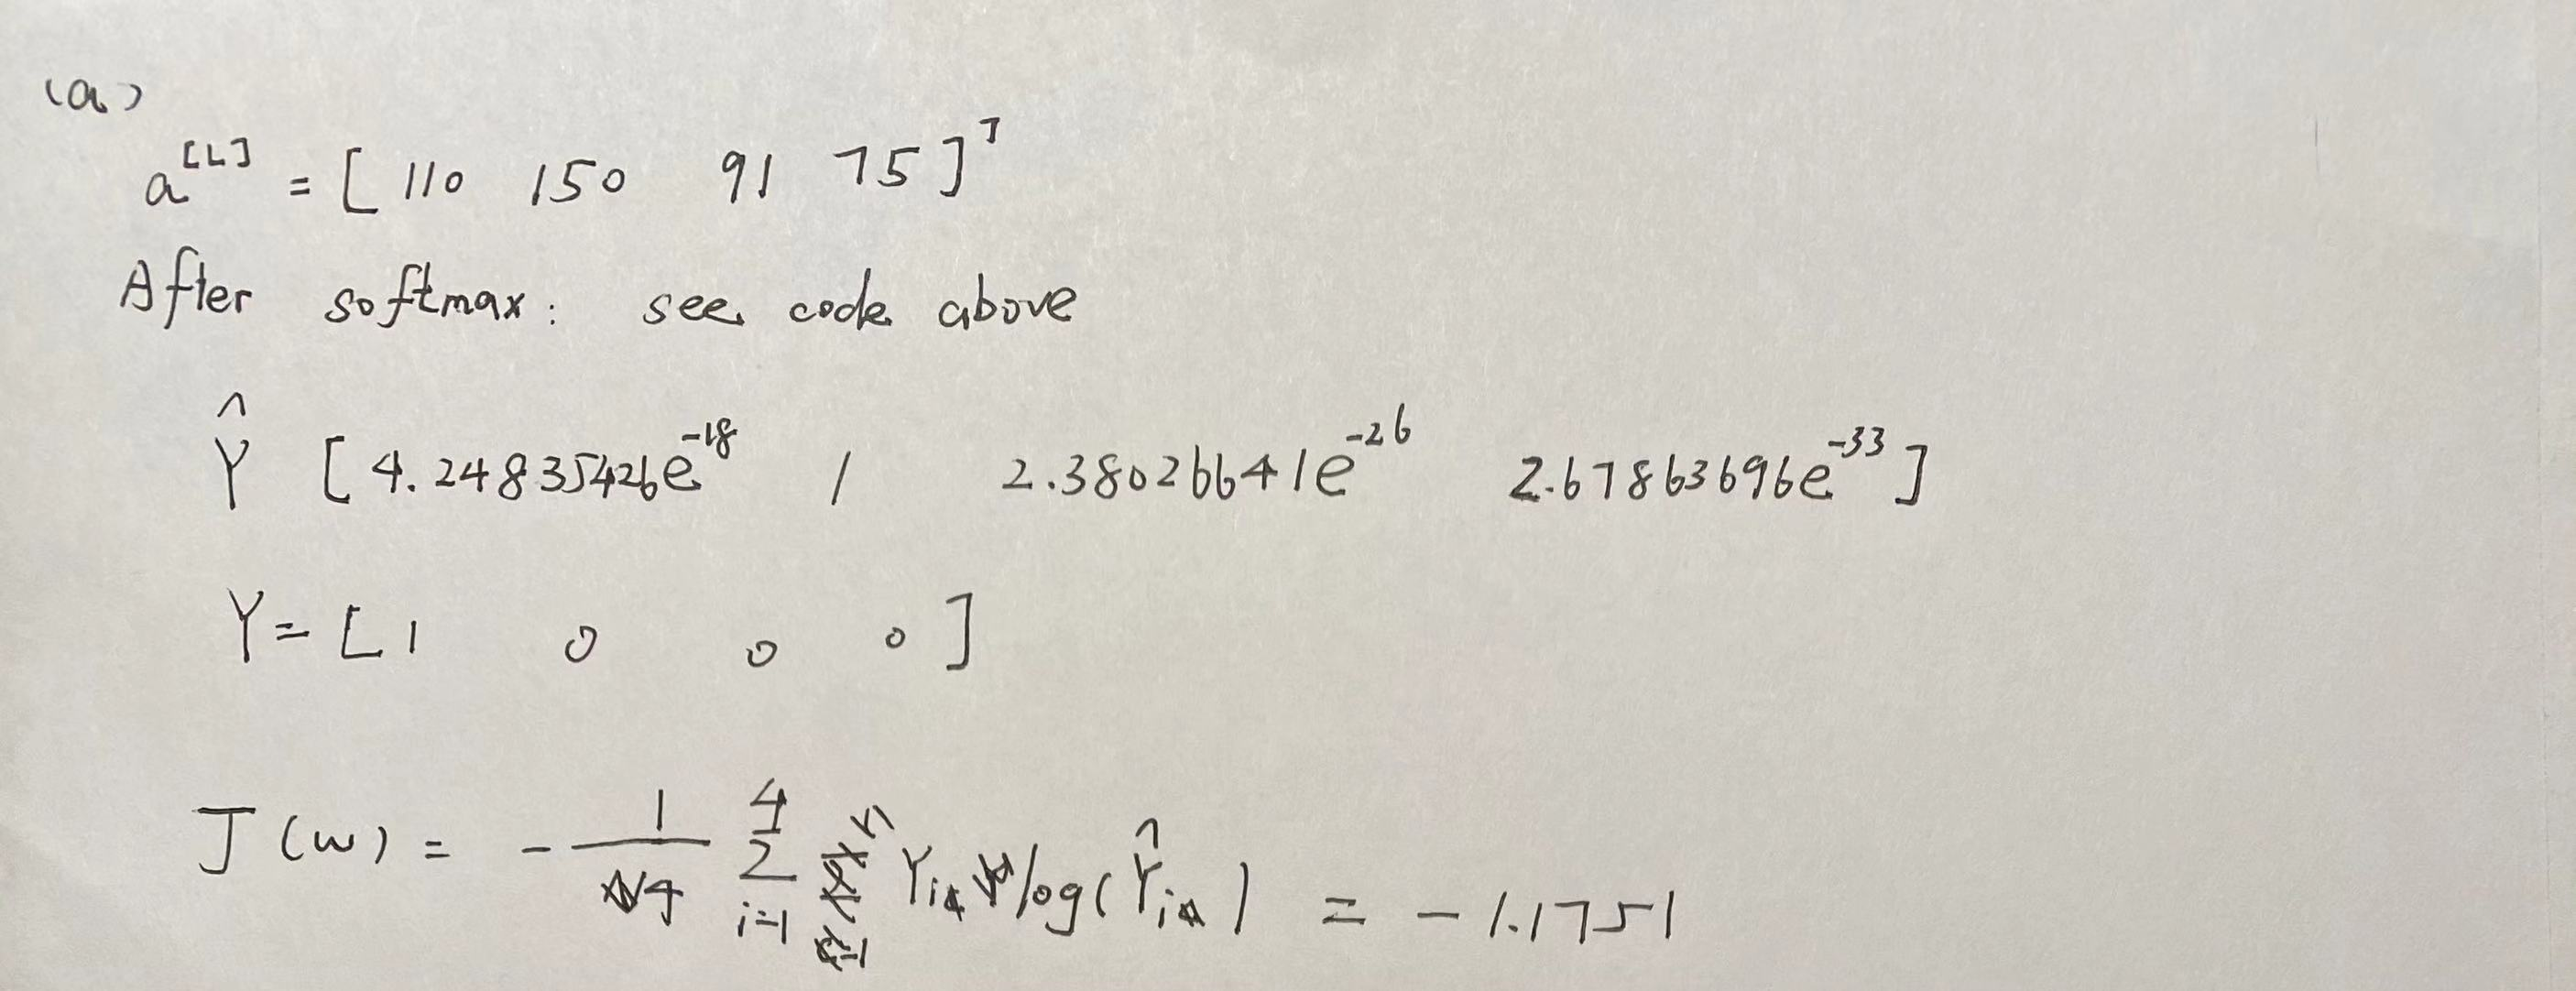

In [ ]:
from IPython.display import Image
# Display the embedded image in the notebook.
Image('WechatIMG2.jpeg', width=1000)

## (b) [10 Points] Proving CE+Softmax link

Prove that the cross-entropy loss will never be equivalent to zero under the softmax activation.

... answer here ...

In [ ]:
# Upload an image file 
uploaded = files.upload()

Saving WechatIMG3.jpeg to WechatIMG3.jpeg


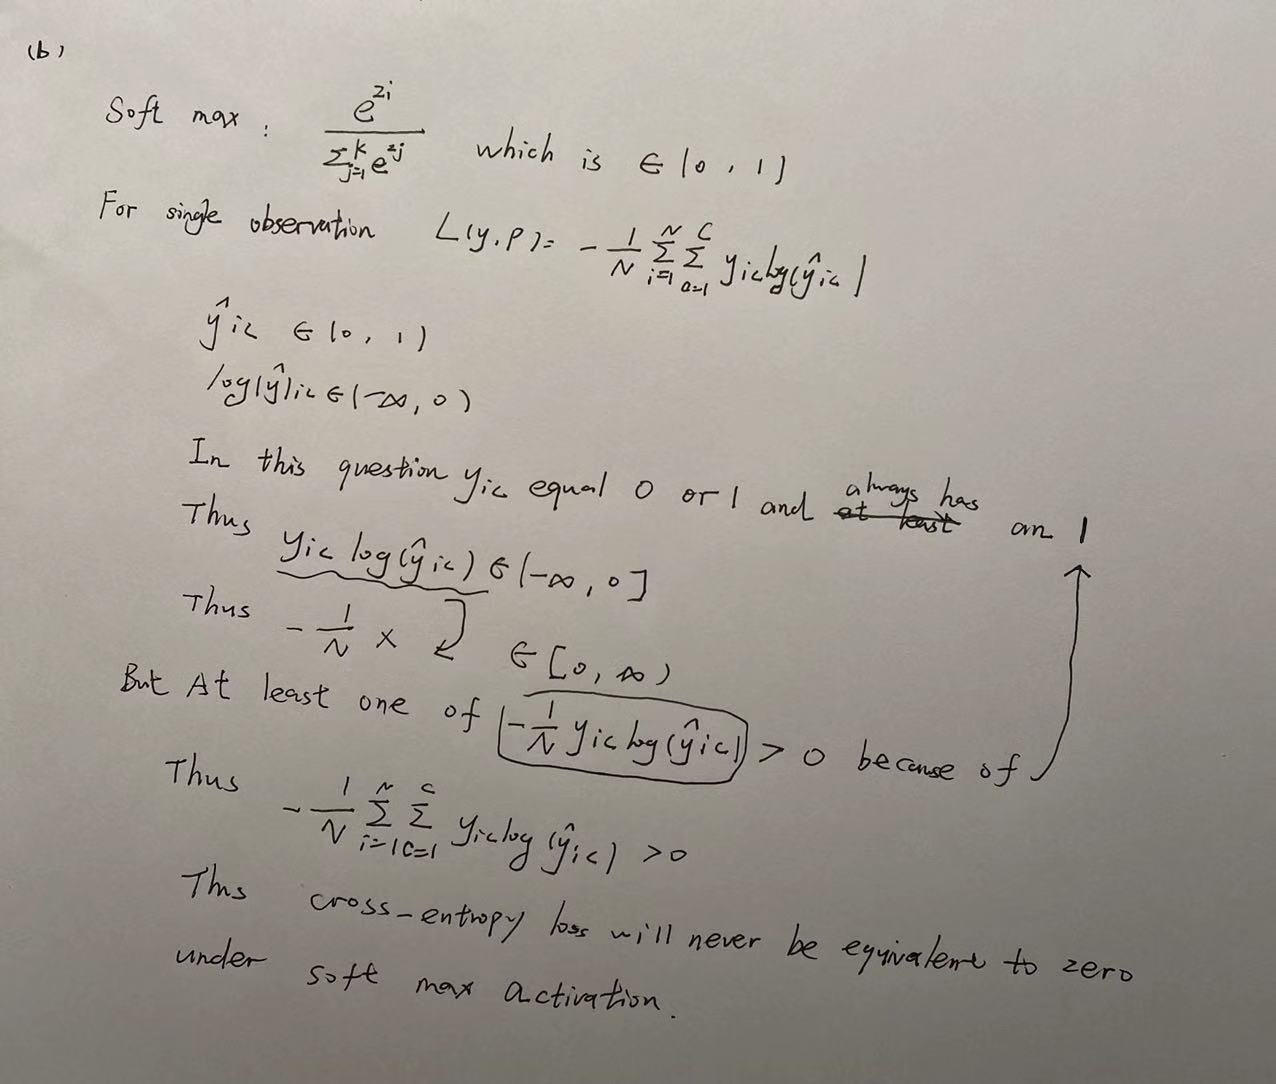

In [ ]:
from IPython.display import Image
# Display the embedded image in the notebook.
Image('WechatIMG3.jpeg', width=1000)

## (c) [5 Points] Regularized Cost

If the network architecture had two layers, say $\mathbf{W}^{[1]}$ and $\mathbf{W}^{[2]}$, what would happen to the cross-entropy cost function under regularization? In particular, write out the new cost functions $J_{\mathcal{L}_2}(\mathbf{W})$ and $J_{\mathcal{L}_2}(\mathbf{W})$. Describe how the weights trained with $\mathcal{L}_2$ would differ from weights trained with $\mathcal{L}_2$.


... answer here ...

In [ ]:
# Upload an image file 
uploaded = files.upload()

Saving WechatIMG4.jpeg to WechatIMG4.jpeg


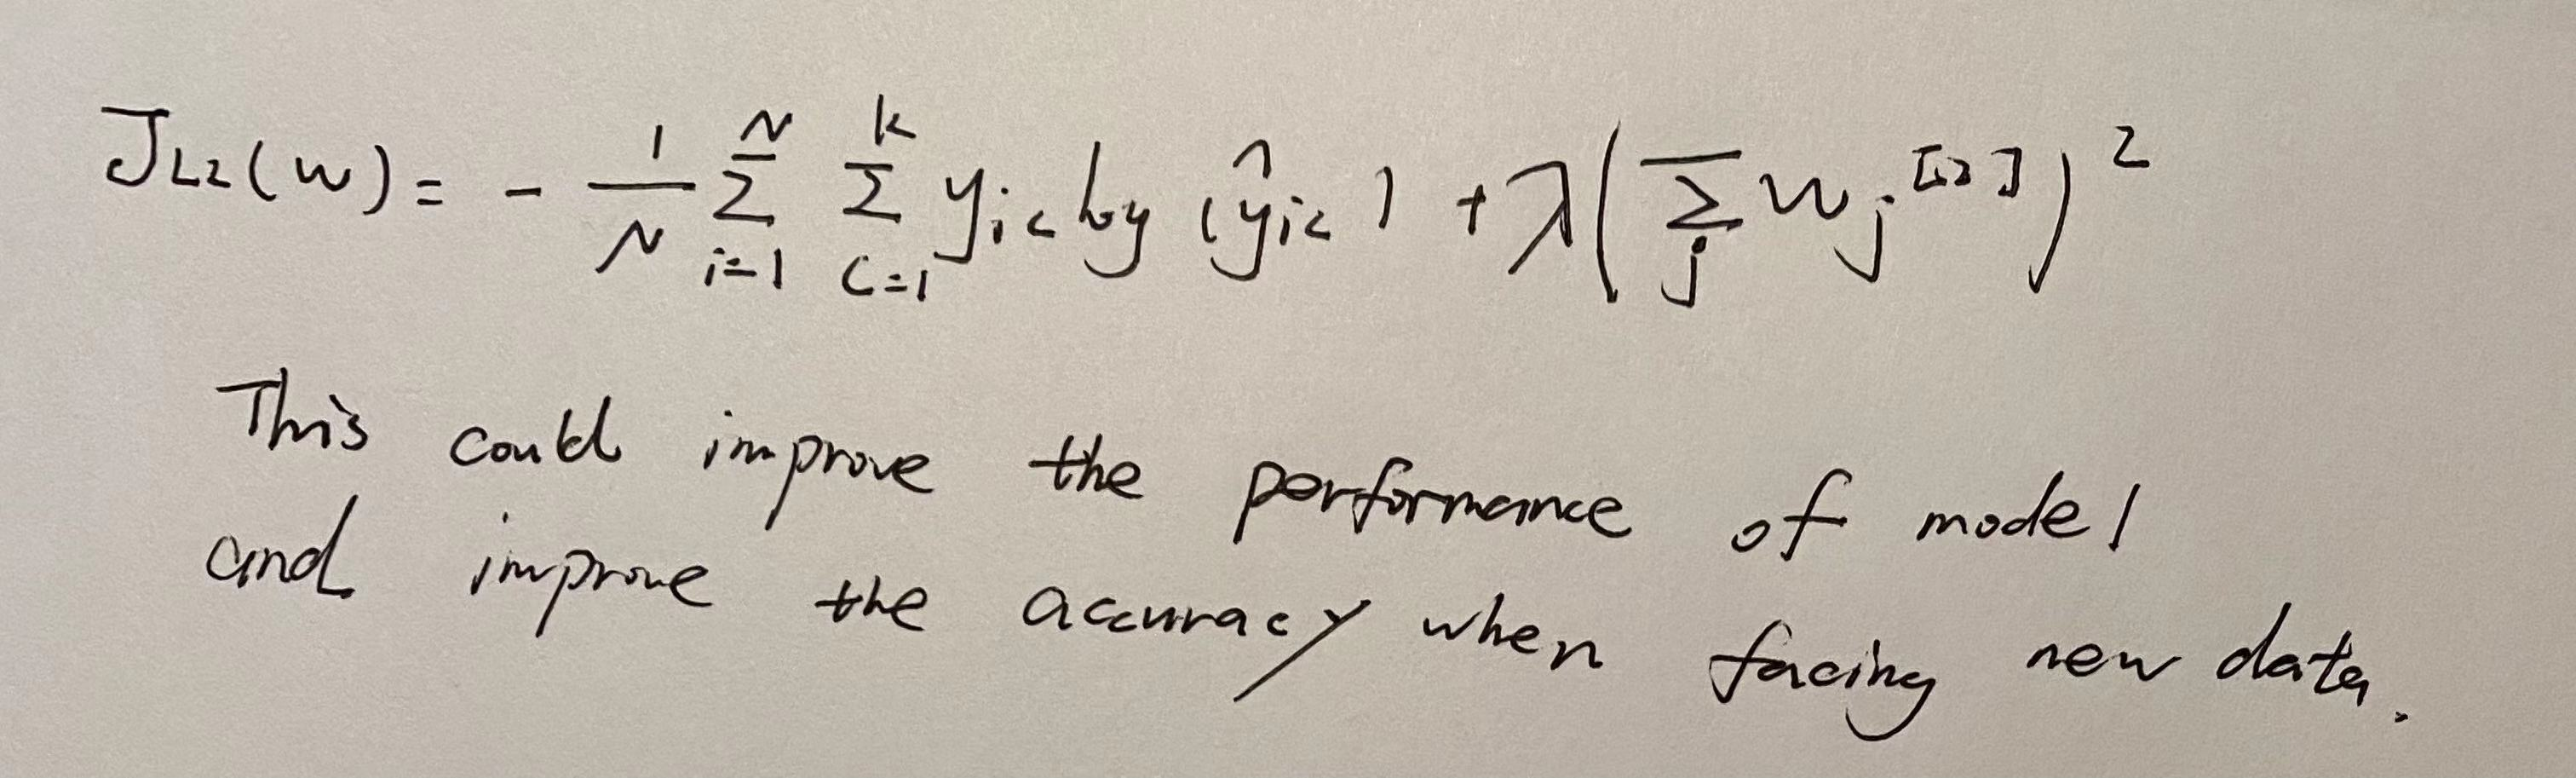

In [ ]:
from IPython.display import Image
# Display the embedded image in the notebook.
Image('WechatIMG4.jpeg', width=1000)

# [40 Points] Exercise 3 - Grendel the destroyer and devourer of our human kind

**Have questions on Exercise 3? Please ask at: <https://campuswire.com/c/G9F0E3E38/feed/80>**


## (a) [10 points] "The dress"

![](https://upload.wikimedia.org/wikipedia/en/a/a8/The_Dress_%28viral_phenomenon%29.png)

In this exercise, the goal is to answer the age old question of whether "the dress" is coloured black and royal blue, or white and gold. To do so, the image will need to be normalized on the RGB scale. 

That is, given an image the RGB values at pixel $x \times y$ are identified as: 

$$\mathrm{ImageColor}(x, y) = (R, G, B)$$

The normalized equivalent is:

$$
\begin{align*}
\mathrm{Total} &= R + G + B \\
R' &= \dfrac{R}{\mathrm{Total}} \times 255 \\
G' &= \dfrac{G}{\mathrm{Total}} \times 255 \\
B' &= \dfrac{B}{\mathrm{Total}} \times 255 \\
\mathrm{ImageColorNormalized}(x, y) &= (R', G', B')
\end{align*}
$$


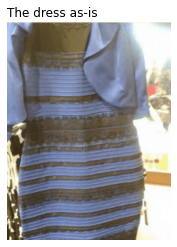

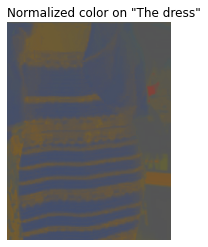

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import imageio
from PIL import Image

# Load Dress
img_dress = imageio.imread(
    'https://upload.wikimedia.org/wikipedia/en/a/a8/The_Dress_%28viral_phenomenon%29.png'
  )

# Disable axes
plt.title(f'The dress as-is', loc = "left")
plt.axis('off')
plt.imshow(img_dress)
plt.show()

# Retrieve pixels
img_pixels = np.asarray(img_dress)

# ... code here ...
total = img_pixels[:, :, 0].astype('int') + img_pixels[:, :, 1].astype('int') + img_pixels[:, :, 2].astype('int')
img_pixels[:, :, 0] = (img_pixels[:, :, 0] / total) * 255
img_pixels[:, :, 1] = (img_pixels[:, :, 1] / total) * 255
img_pixels[:, :, 2] = (img_pixels[:, :, 2] / total) * 255

# ... end code ... 

# Graph the normalized image
img_dress_normalized = Image.fromarray(img_pixels)
plt.title(f'Normalized color on "The dress"', loc = "left")
plt.axis('off')
plt.imshow(img_dress_normalized)
plt.show()

## (b) [10 points] Augmenting CIFAR-10 

In this exercise, you will augment the CIFAR-10 data set. This data set contains 10 classes that should be labeled on each image.


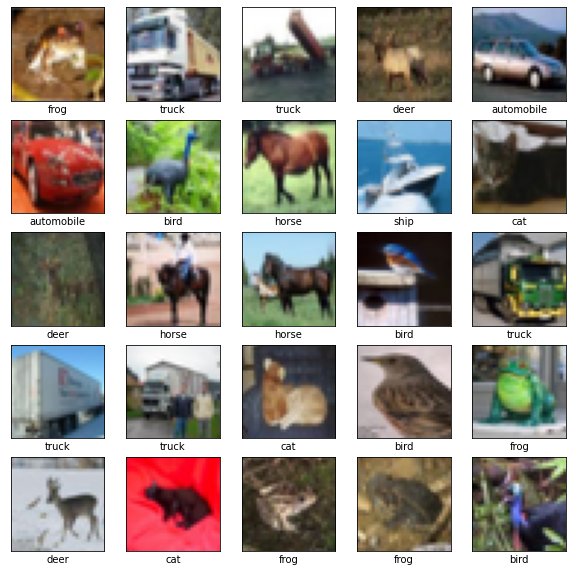

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

# Load the data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

Pre-process the data by normalizing the image pixels using:

$$\mathrm{NormalizeImage}(x) = \dfrac{x - \mathrm{mean}(x)}{\mathrm{max}\left(\mathrm{sd}\left(x\right), 0.001\right)}$$

where $x$ is the value of a **single image** with dimensions $32 \times 32 \times 3$ ranging from 0 to 255. 

**Notes:** 

- `sd(x)` may return small numbers if the image is uniform in pixel allocations. The denominator implements a protection from such cases to 
avoid any possibility of a division near zero.
- As the input is an `integer`, make sure to cast `x` to `float` using `x.astype(float)`


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

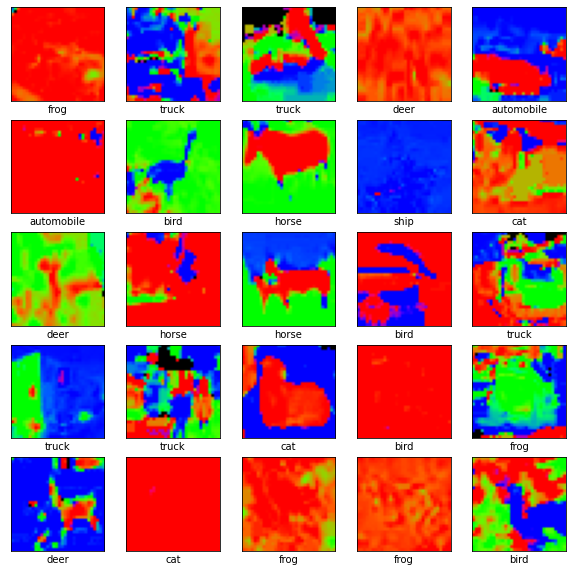

In [ ]:
# code here
#np.mean(x_train.reshape(5000, -1))
#x_train = x_train.astype(float)
#mean = np.mean(x_train.reshape(50000, -1), axis=1, keepdims=True)
#std = np.std(x_train.reshape(50000, -1), axis=1, keepdims=True)
#x_train_nor = ((x_train.reshape(50000, -1) - mean)/np.maximum(std, 0.001)).reshape(50000, 32, 32, 3)


x_train = x_train.astype(float)
mean = np.mean(x_train.reshape(-1, 3), axis=1, keepdims=True)
up = x_train.reshape(-1, 3) - mean
sd = np.std(x_train.reshape(-1, 3), axis=1, keepdims=True)
down = np.maximum(sd, 0.001)
x_train_nor = (up / down).reshape(50000, 32, 32, 3)

########
# for x_test
x_test = x_test.astype(float)
mean_ = np.mean(x_test.reshape(-1, 3), axis=1, keepdims=True)
up = x_test.reshape(-1, 3) - mean_
sd_ = np.std(x_test.reshape(-1, 3), axis=1, keepdims=True)
down = np.maximum(sd_, 0.001)
x_test_nor = (up / down).reshape(10000, 32, 32, 3)


########
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_nor[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()
#
#x_test = x_test.astype(float)
#b = np.mean(x_test.reshape(10000, -1), axis=1, keepdims=True)
#x_test_nor = ((x_test.reshape(10000, -1) - b)/np.maximum(np.std(x_test.reshape(10000, -1), axis=1, keepdims=True), 0.001)).reshape(10000, 32, 32, 3)

After normalizing the image, perform data augmentation by:

1. randomly selecting **150** images from the existing data set; and
2. creating new images by horizontally flipping the image (left to right).

**Show the transformations done to create one image.**


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


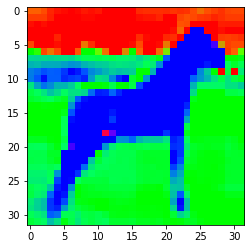

In [ ]:
# .. code here ...
rand = np.random.choice(np.arange(1,50001) , size=150, replace=False)
x_train_nor_rand = x_train_nor[rand,:,:,:]
x_train_nor_rand_hor = np.flip(x_train_nor_rand, 3)
x_train_nor_rand_hor
plt.imshow(x_train_nor_rand_hor[0], cmap=plt.cm.binary)

## (c) [20 Points] Fitting to CIFAR-10

Using the CIFAR-10 data combined with the newly created data in **(b)**, construct and train a neural network using **Keras** that has the following structure:

- CONV2D layer with 16 filters with dimensions 3 x 3 and activation of ReLU
- MAXPOOL2D layer with a filter of 2x2
- CONV2D layer with 32 filters with dimensions 3 x 3 and activation of TanH
- MAXPOOL2D layer with a filter of 2x2
- CONV2D layer with 64 filters with dimensions 3 x 3 and activation of TanH
- MAXPOOL2D layer with a filter of 2x2
- DENSE or FC layer with 64 neurons and activation of ReLU
- DENSE or FC layer with 10 neurons and activation of Softmax.

Show the model layer information.

Use the `Adam` optimization technique with the `SparseCategoricalCrossentropy` loss function on a metric of `accuracy`.

Train for **20 epochs** with a minibatch size of **64** observations. Try three different learning rates.

Helpful Documentation References: 

- [CONV2D Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
- [MAXPOOL 2D Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)
- [DENSE Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
- [SparseCategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)
- [ADAM optimization technique](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

In [ ]:
# code here ... 
from tensorflow.keras import models
from tensorflow.keras import layers 
from tensorflow.keras import optimizers





model = models.Sequential()
model.add(
    layers.Conv2D(16,(3, 3),
    activation='relu',
    input_shape = (32, 32, 3))
)
# 30 30 16
model.add(layers.MaxPooling2D((2, 2)))
# 29 29 16
model.add(
    layers.Conv2D(32,(3, 3),
    activation='tanh')
)
# 27 27 32
model.add(layers.MaxPooling2D((2, 2)))
# 26 26 32
model.add(
    layers.Conv2D(64,(3, 3),
    activation='tanh')
)
# 24 24 64
model.add(layers.MaxPooling2D((2, 2)))
# 23 23 64
model.add(
 layers.Flatten()
)
model.add(
 layers.Dense(64, activation='relu')
) 
model.add(
 layers.Dense(10, activation='softmax')
)
# sumary
model.summary()
#
model.compile(
  optimizer = optimizers.Adam(learning_rate=1e-4),
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy']
)

hist = model.fit(x_train_nor, y_train,
  batch_size = 64,
 epochs = 20, validation_data=(x_test_nor, y_test)) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

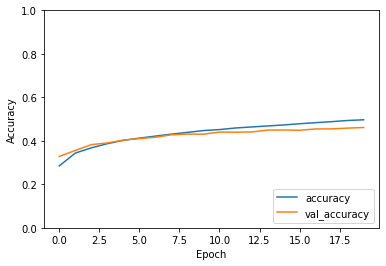

In [ ]:
# Graph the model's performance here

def graph_accuracy(model_trained):
  plt.plot(model_trained.history['accuracy'], label='accuracy')
  plt.plot(model_trained.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='lower right')

graph_accuracy(hist)

# [15 Points] Exercise 4 - #YOLO ALMA

**Have questions on Exercise 4? Please ask at: <https://campuswire.com/c/G9F0E3E38/feed/81>**

**Warning: This problem will take a variable amount of time to setup depending on the time of day!**

In this exercise, we'll try to classify everyday objects from the
[Alma webcam](https://illinois.edu/about/almacam.html) and [Quadcam](https://illinois.edu/about/quadcam.html) using the [You Only Look Once (YOLO) v3](https://pjreddie.com/darknet/yolo/).

Prior to beginning this problem, please make sure that a **GPU is enabled** by going to:

```
Runtime -> Change runtime type -> Hardware Accelerator -> GPU
```

Next, please run the following setup code to setup the environment for predicting with YOLO v3. In-depth instructions follow immediately after the setup code.

## Setup Code 

Portions of the setup code are based on [yolov3-tf2](https://colab.research.google.com/github/zzh8829/yolov3-tf2/blob/master/colab_gpu.ipynb) document. Further modifications were made to simply the process of initializing the model. Please run each code chunk in order. Failure to do so may result in issues when trying to detect an image with YOLO v3.

In [ ]:
# Suppress output
%%capture

# 1. Setup the model environme
!git clone https://github.com/zzh8829/yolov3-tf2
%cd yolov3-tf2/
!pip install -r requirements-gpu.txt

In [ ]:
# 2. Retrieve the pretrained model
!wget https://pjreddie.com/media/files/yolov3.weights -O data/yolov3.weights
!python convert.py

--2020-11-05 05:04:00--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘data/yolov3.weights’

data/yolov3.weights 100%[===================>] 236.52M   573KB/s    in 5m 8s   

2020-11-05 05:09:09 (786 KB/s) - ‘data/yolov3.weights’ saved [248007048/248007048]

2020-11-05 05:09:10.303177: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-11-05 05:09:10.303327: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directo

In [ ]:
# Change into the yolov3-tf2 directory
# Failure to do so will result in checkpoints not being found.
%cd yolov3-tf2/
!ls

[Errno 2] No such file or directory: 'yolov3-tf2/'
/content/yolov3-tf2
checkpoints	 data		  README.md		train.py
colab_gpu.ipynb  detect.py	  requirements-gpu.txt	yolov3_tf2
conda-cpu.yml	 detect_video.py  requirements.txt	yolov3_tf2.egg-info
conda-gpu.yml	 docs		  setup.py
convert.py	 LICENSE	  tools


In [ ]:
# 3. Structure the YOLO model 
import sys
from absl import app, logging, flags
from absl.flags import FLAGS
import time
import cv2
import numpy as np
import requests
%tensorflow_version 2.x
import tensorflow as tf
from yolov3_tf2.models import (
    YoloV3, YoloV3Tiny
)
from yolov3_tf2.dataset import transform_images, load_tfrecord_dataset
from yolov3_tf2.utils import draw_outputs

# Ensure no duplicate flags exist if code chunk is re-run multiple times.
def del_all_flags():
    for name in list(flags.FLAGS):
        if name in ['classes', 'weights', 'tiny',
                    'size', 'image', 'tfrecord', 'output',
                    'num_classes']:
            delattr(flags.FLAGS, name)

del_all_flags()
# Remove flags

# Define set of flags required for processing data.
flags.DEFINE_string('classes', './data/coco.names', 'path to classes file')
flags.DEFINE_string('weights', './checkpoints/yolov3.tf',
                    'path to weights file')
flags.DEFINE_boolean('tiny', False, 'yolov3 or yolov3-tiny')
flags.DEFINE_integer('size', 416, 'resize images to')
flags.DEFINE_string('image', './data/girl.png', 'path to input image')
flags.DEFINE_string('tfrecord', None, 'tfrecord instead of image')
flags.DEFINE_string('output', './output.jpg', 'path to output image')
flags.DEFINE_integer('num_classes', 80, 'number of classes in the model')

# Explicitly request flags be parsed prior to accessing them in the next code chunk.
# https://github.com/google/python-gflags/issues/37#issuecomment-297800637
FLAGS([sys.argv])

## Uncomment and change to allow for classification with lower probabilities
## in exercise (b) 
# FLAGS.yolo_score_threshold = 0.5

# Verify that a GPU is available
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print("GPU Detected ...")
else:
  print("GPU not found ... \n\
         Please make sure to enable a GPU prior to continuing.\
         Follow notes at the start of the problem")

GPU Detected ...


In [ ]:
# Bring online the model
if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)

# Ensure model loads correctly
yolo.load_weights(FLAGS.weights).expect_partial()
print('Loaded: weights ... ')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
print('Loaded: classes ... ')


Loaded: weights ... 
Loaded: classes ... 


## (a) [10 Points] Detecting Objects

In this exercise, we're interested in detecting within images from the Alma mater webcam and the quad cam these objects:

- person
- bicycle
- backpack
- dog
- bird

Obtain the images from:

 - https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-1.png
 - https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-2.png
 - https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-3.png
 - https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-4.png
 - https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-5.png
 - https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-6.png
 - https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-7.png
 - https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-8.png
 - https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/quad-cam-1.jpeg
 - https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/quad-cam-2.jpeg
 - https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/quad-cam-3.jpeg

So, the first image can be retrieved with:

```
https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-1.png
```

Dynamically construct a Pandas dataframe that contains the ImageID and a count of each object under the given class. e.g.

| ImageID    | Person | Bicycle | Backpack | Dog | Bird         |
|:-----------|--------|---------|----------|-----|--------------|
| example-1  | 0      |     1   | 1        | 0   |    0         |

To help in this endeavor, the author has made available a set of functions to  model with the existing network. Please use these functions to load images and model the data.


In [ ]:
# Retrieve image from online
def download_img(url):
  return requests.get(url).content

# Internal function that pads the image with an additional dimension
# such that an image goes from height x width to examples x height x width
# and standardize the image with a fixed size
def clean_img(img_raw, img_size = FLAGS.size):
  # Expand dimension to obtain a single image
  img = tf.expand_dims(img_raw, 0)
  # Transform image to specific size
  img = transform_images(img, img_size)
  return img

# Load the image downloaded from the internet
def load_img_binary(img_dl, channels = 3, img_size = FLAGS.size):
  img_raw = tf.image.decode_image(img_dl, channels = channels)
  img = clean_img(img_raw, img_size)
  return img, img_raw
  
# Load the image found locally
def load_img_file(path, channels = 3, img_size = FLAGS.size):
  # Load image file from path
  img, img_raw = load_img_binary(open(path, 'rb').read(), 
                        channels, img_size)
  return img, img_raw

# Perform a classification with the YOLO network
def classify_img(img, yolo):
  t1 = time.time()
  boxes, scores, classes, nums = yolo(img)
  t2 = time.time()
  print(f'Elapsed time: {t2 - t1} ...')
  return boxes, scores, classes, nums

# Traceback of the detections found in the image
# Useful for understanding what was detected in a single image
def img_detect(boxes, scores, classes, nums, class_names):
  print('Detections ...')
  for i in range(nums[0]):
    classes_found = class_names[int(classes[0][i])]
    class_confidence = np.array(scores[0][i])
    box_outline = np.array(boxes[0][i])
    print(f'\t{classes_found}, {class_confidence}, {box_outline}')

# Render the image with detected object in boxes
def img_draw_boxes(img, img_raw, boxes, scores, classes, nums, class_names):
  img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)
  img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
  from IPython.display import Image, display
  display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))



Consider the following image from a UIUC blog:

In [ ]:
from IPython.display import Image
Image(url='https://blogs.illinois.edu/files/6231/545166/117021.jpg', width=500)

The YOLOv3 algorithm could be used by:

Elapsed time: 0.08307027816772461 ...
Detections ...
	person, 0.9938567876815796, [0.553931   0.74049866 0.6068485  0.96994627]
	person, 0.9927719831466675, [0.4844485  0.8200235  0.54835624 1.        ]
	person, 0.9881024360656738, [0.44659895 0.74617267 0.49925917 0.9744003 ]
	person, 0.9852889180183411, [0.05976508 0.8181027  0.13217011 0.9998932 ]
	person, 0.981249988079071, [0.04452583 0.513525   0.9649203  0.9459822 ]
	person, 0.9568405747413635, [5.6389160e-04 7.3764223e-01 4.7801137e-02 9.3712097e-01]
	person, 0.9547746777534485, [0.80247855 0.6636031  0.8359437  0.84464234]
	person, 0.9488782286643982, [0.27130494 0.72548854 0.31403163 0.9231179 ]
	person, 0.9013316631317139, [0.9529335 0.6823874 0.9966491 0.8689783]
	person, 0.8021208643913269, [0.18343948 0.7712548  0.22755505 0.9329134 ]
	person, 0.7675495743751526, [0.91145086 0.6747239  0.94935536 0.84592074]
	person, 0.7647446990013123, [0.6205256  0.7921954  0.66168165 0.88365465]
	person, 0.7575169801712036, [0.15272693

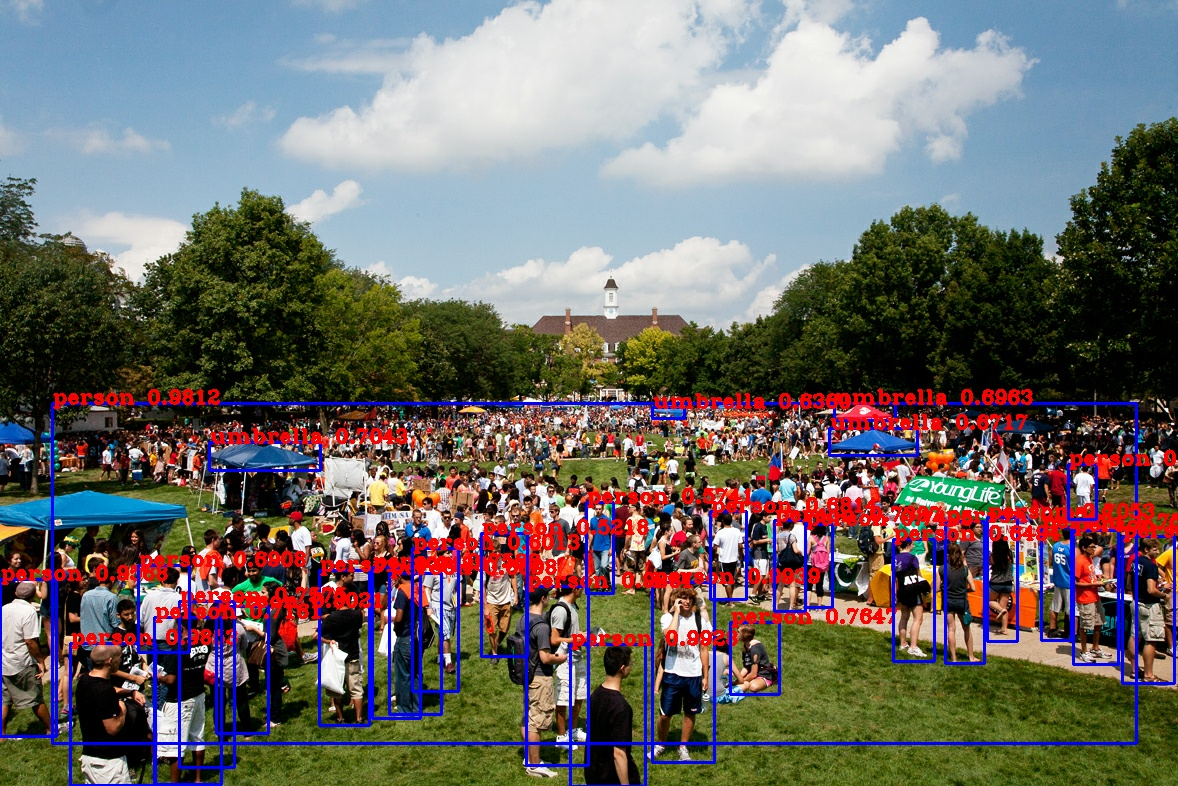

In [ ]:
# Example image download and read 
img, img_raw = load_img_binary(
    download_img("https://blogs.illinois.edu/files/6231/545166/117021.jpg")
)

boxes, scores, classes, nums = classify_img(img, yolo)
img_detect(boxes, scores, classes, nums, class_names)
img_draw_boxes(img, img_raw, boxes, scores, classes, nums, class_names)

In [ ]:
import pandas as pd


########## code here START
image_url = []
def auto(image_url):
  dafa_list = []
  for i in image_url:
    img, img_raw = load_img_binary(
      download_img(i)
    )
    boxes, scores, classes, nums = classify_img(img, yolo)
    count = []
    for i in range(nums[0]):
      classes_found = class_names[int(classes[0][i])]
      count.append(classes_found)
    count_array = np.array(count)
    values, counts = np.unique(count_array, return_counts=True)
    dafa = pd.DataFrame(counts.reshape(1,-1), columns=list(values))
    dafa_list.append(dafa)
  to_return = pd.concat(dafa_list, ignore_index=True, sort=False)
  index = []
  for i in range(len(image_url)):
    index.append(f'example-{i+1}')
  to_return['ImageID'] = index
  to_return.set_index('ImageID', inplace=True)
  return to_return
########## END



# Consider structuring the problem by:
# 1. Generate a list of images
# 2. Classify each image
# 3. Store results inside of a data.frame

url_base = "https://fa20.fdl.thecoatlessprofessor.com/hw/hw05"
urls = [f"{url_base}/alma-cam-{i}.png" for i in range(1, 8)] + \
       [f"{url_base}/quad-cam-{i}.jpeg" for i in range(1, 3)]

# This makes urls have between:
# https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/quad-cam-1.jpeg
# https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-1.png

# Change the threshold for classifying images…
FLAGS.yolo_score_threshold = 0.2

In [ ]:
############ Here's where i test my bot.
test_url = ['https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-1.png',
'https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-2.png',
'https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-3.png',
'https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-4.png',
'https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-5.png',
'https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-6.png',
'https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-7.png',
'https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-8.png',
'https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/quad-cam-1.jpeg',
'https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/quad-cam-2.jpeg',
'https://fa20.fdl.thecoatlessprofessor.com/hw/hw05/quad-cam-3.jpeg',
]
auto(test_url)

Elapsed time: 0.07252144813537598 ...
Elapsed time: 0.07155942916870117 ...
Elapsed time: 0.07286739349365234 ...
Elapsed time: 0.07371115684509277 ...
Elapsed time: 0.08049964904785156 ...
Elapsed time: 0.08033251762390137 ...
Elapsed time: 0.0720820426940918 ...
Elapsed time: 0.07320833206176758 ...
Elapsed time: 0.07667422294616699 ...
Elapsed time: 0.07822489738464355 ...
Elapsed time: 0.07209992408752441 ...


person  traffic light  backpack
ImageID                                    
example-1      6.0            1.0       NaN
example-2      7.0            NaN       NaN
example-3      5.0            NaN       NaN
example-4      6.0            NaN       2.0
example-5      7.0            NaN       NaN
example-6      6.0            NaN       NaN
example-7      6.0            NaN       NaN
example-8      8.0            NaN       NaN
example-9      NaN            NaN       NaN
example-10     1.0            NaN       NaN
example-11     NaN            NaN       NaN

The function i wrote above can automatically add new column names if it does exsist.

## (b) [5 Points] Upload and run your own image! 

In this exercise, you will repeat the prior exercise but instead you will select the classes that should be detected from an image you supply.

View all possible classes by exploring the [data/coco.names](https://github.com/pjreddie/darknet/blob/master/data/coco.names) class names file.


In [ ]:
# Upload an image file 
uploaded = files.upload()

Saving 430.jpg to 430.jpg


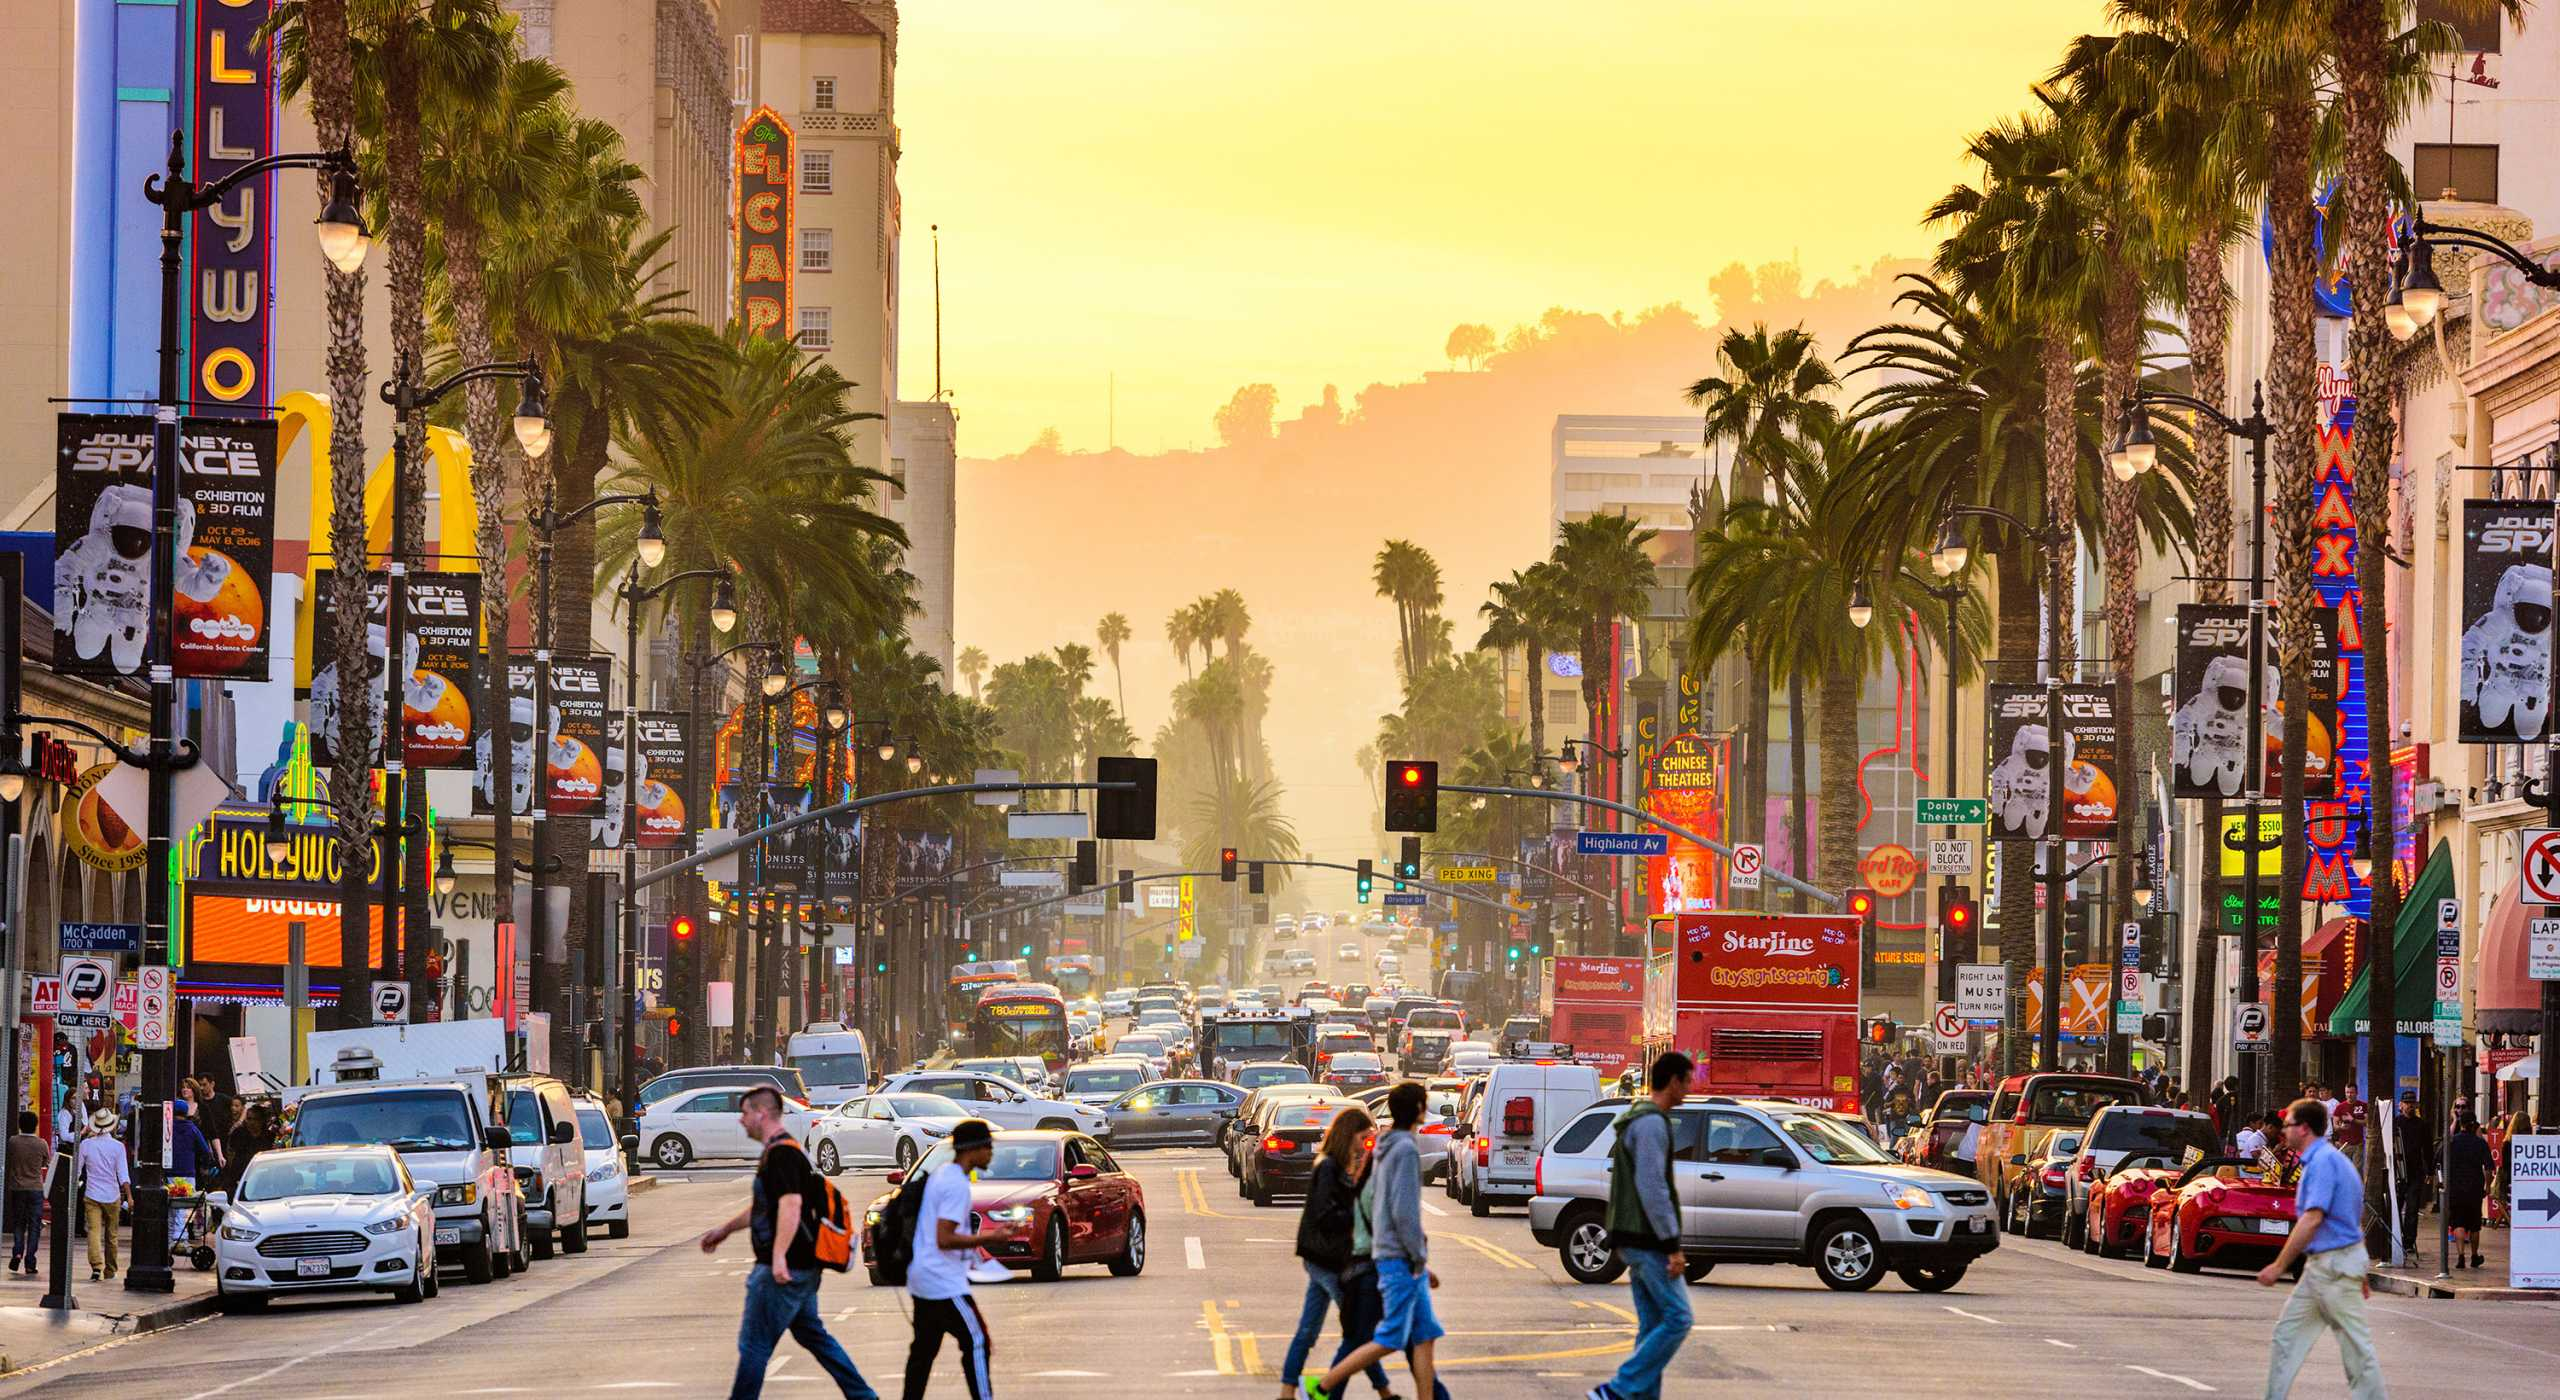

In [ ]:
from IPython.display import Image
# Display the embedded image in the notebook.
aa = Image('430.jpg', width=1000)
aa

Elapsed time: 0.08586907386779785 ...
Detections ...
	person, 0.9939472079277039, [0.27321723 0.78753936 0.33723375 1.        ]
	person, 0.9917051196098328, [0.34561533 0.80591285 0.39718896 1.        ]
	person, 0.9905542135238647, [0.87101394 0.7927951  0.93769294 0.9951715 ]
	car, 0.9841938018798828, [0.2470421  0.7667194  0.31358796 0.8358833 ]
	car, 0.9814965128898621, [0.36325458 0.79738855 0.4423161  0.91643643]
	person, 0.9811047911643982, [0.5130542  0.78288174 0.5763821  0.9981015 ]
	car, 0.977889895439148, [0.42521277 0.7716237  0.49010894 0.82325095]
	traffic light, 0.9739381670951843, [0.54067385 0.5421565  0.56101835 0.5927703 ]
	car, 0.9734107851982117, [0.48028827 0.7716807  0.53152025 0.8599129 ]
	car, 0.9707324504852295, [0.08519783 0.8094812  0.17421821 0.931897  ]
	person, 0.9401010870933533, [0.02840139 0.7976025  0.05340996 0.91625017]
	car, 0.9122801423072815, [0.61815757 0.7848374  0.7807198  0.9238091 ]
	person, 0.8786867260932922, [0.9518948  0.79128325 0.98010

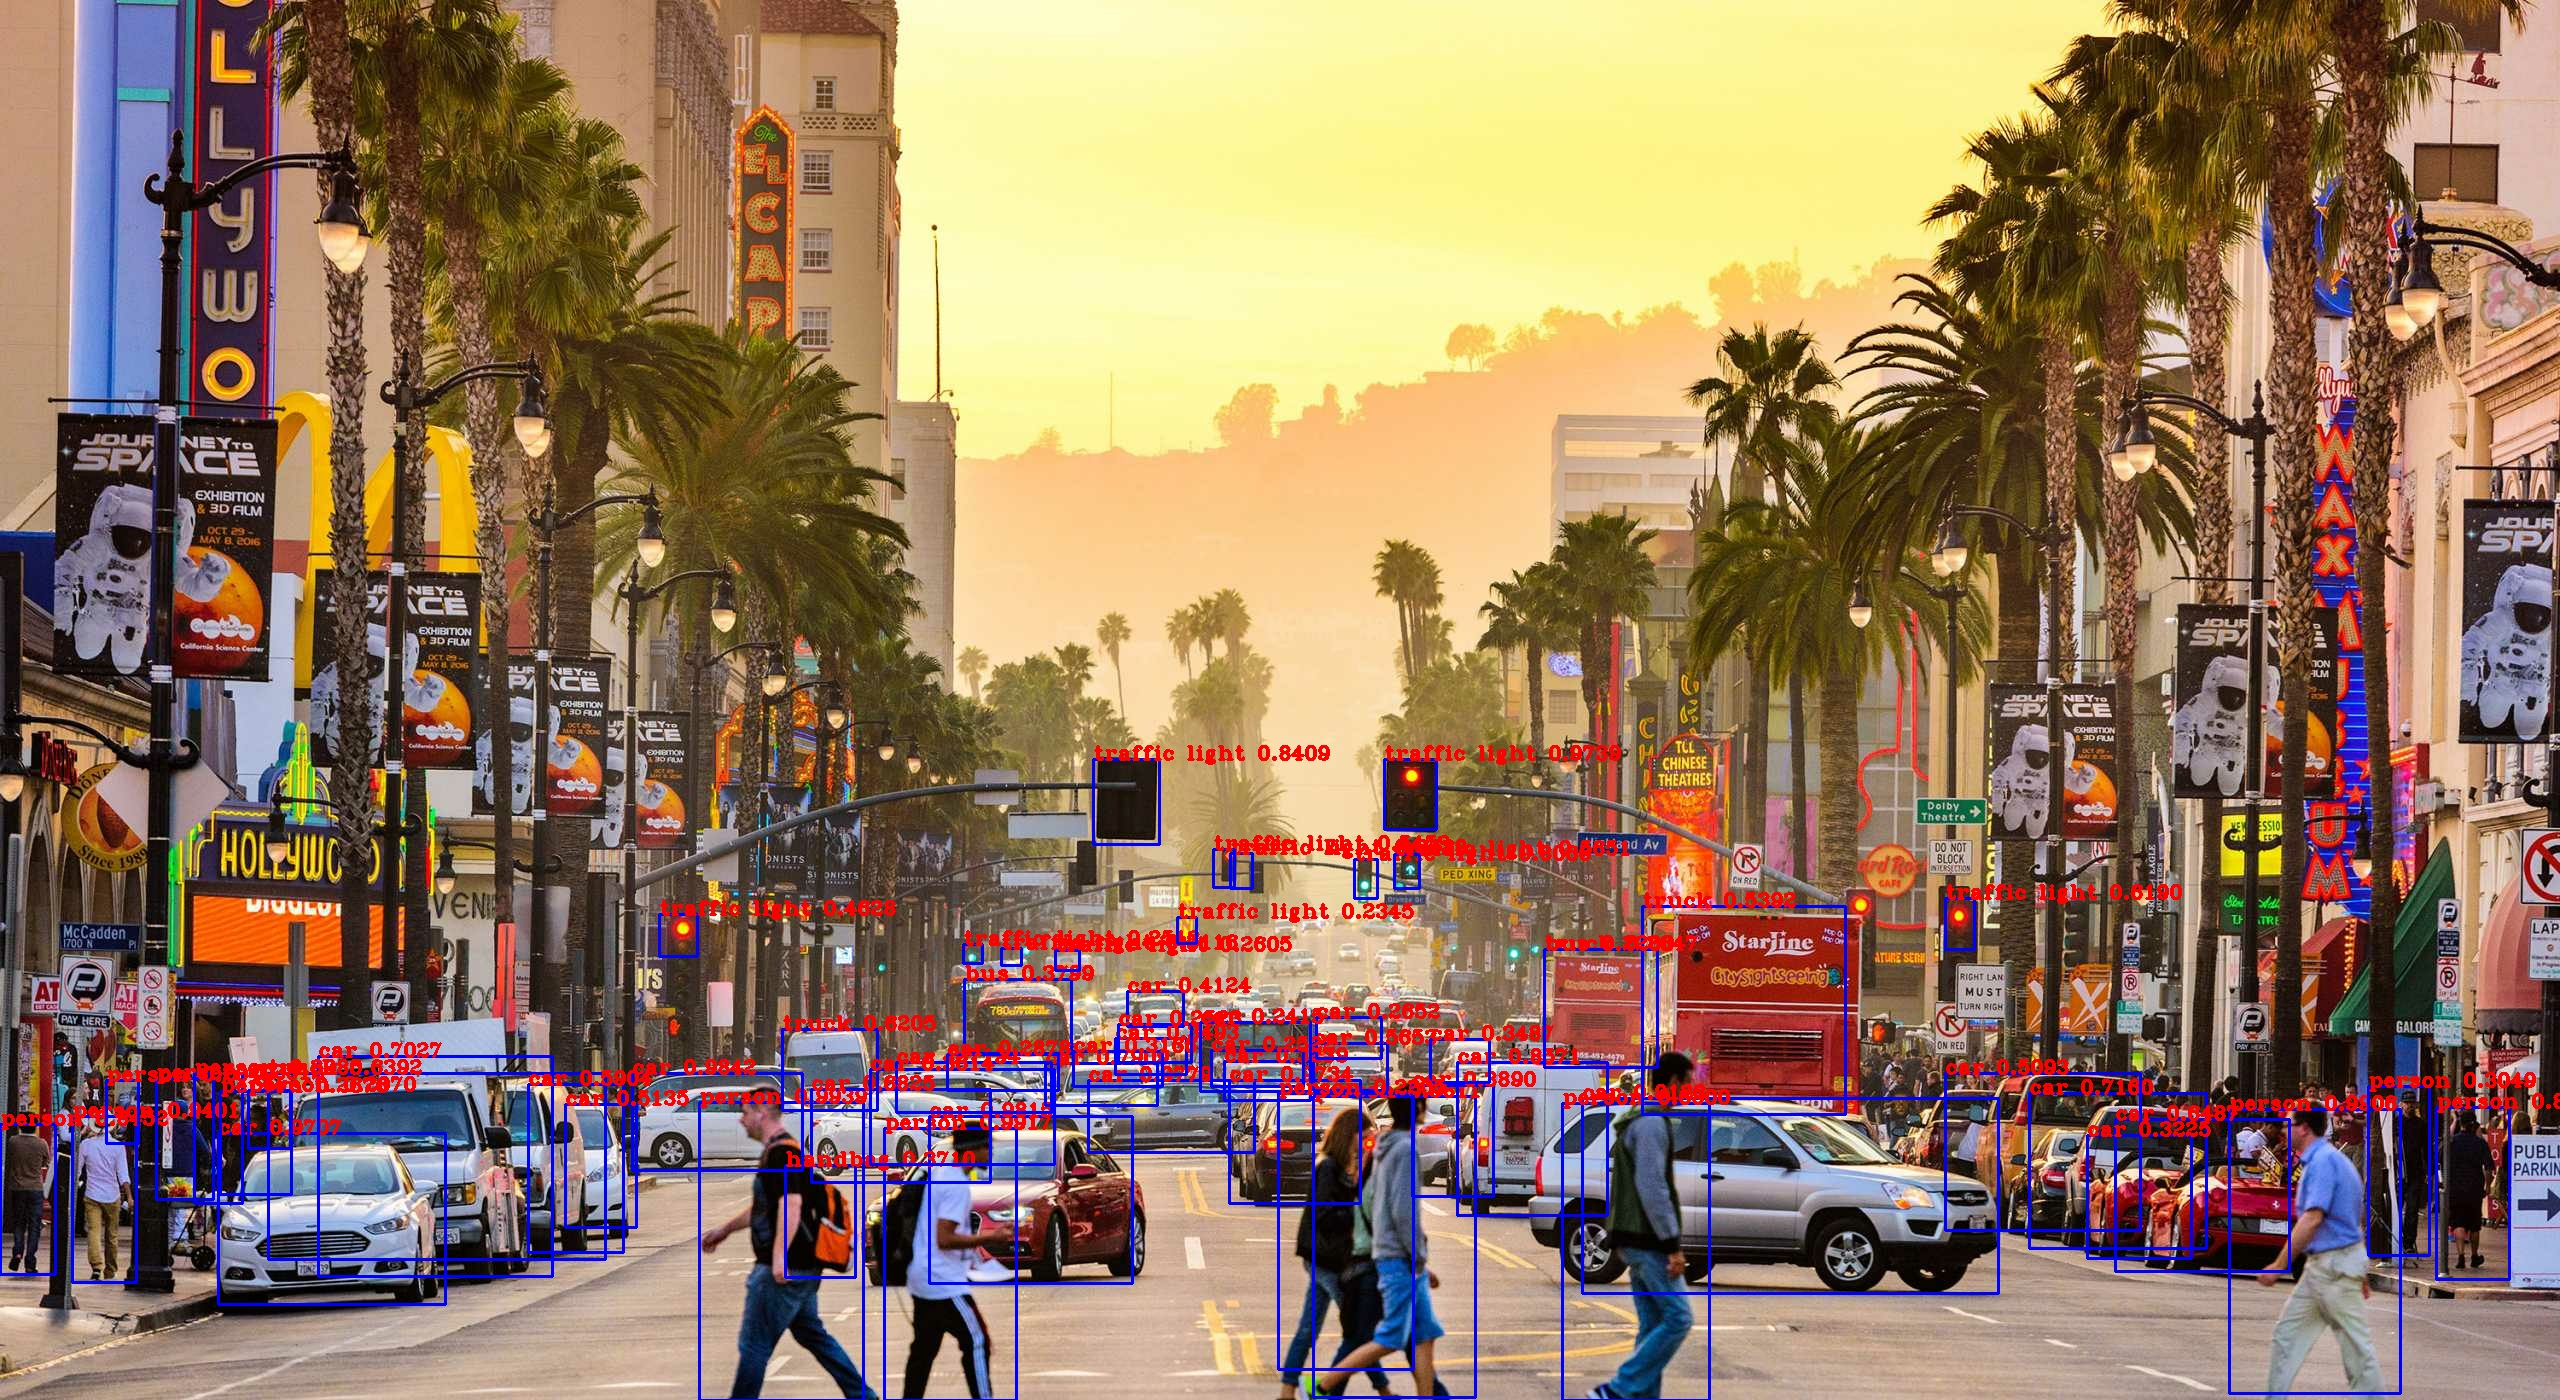

Elapsed time: 0.14086294174194336 ...


bus  car  handbag  person  traffic light  truck
ImageID                                                   
example-1    2   30        1      15             12      4

In [ ]:
# ... code here ... 
# I created a url for my image
img, img_raw = load_img_binary(
    download_img("https://i.imgur.com/mXS6pyV.jpg")
)
boxes, scores, classes, nums = classify_img(img, yolo)
img_detect(boxes, scores, classes, nums, class_names)
img_draw_boxes(img, img_raw, boxes, scores, classes, nums, class_names)
auto(["https://i.imgur.com/mXS6pyV.jpg"])